# Notebook with data visualization to understand skew in the protected attributes and label on titanic data

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

from falsb4mpa.dataset.load_data import load_data

### Titanic data (pre-prep)

In [3]:
train_data = pd.read_csv("../../data/raw/titanic/titanic_train.csv", index_col='PassengerId')
test_data = pd.read_csv("../../data/raw/titanic/titanic_train.csv", index_col='PassengerId')

data = pd.concat([train_data, test_data])

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
len(data.index)

1782

In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Viz

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/491848776.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/491848776.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[1], train_counts[1]]


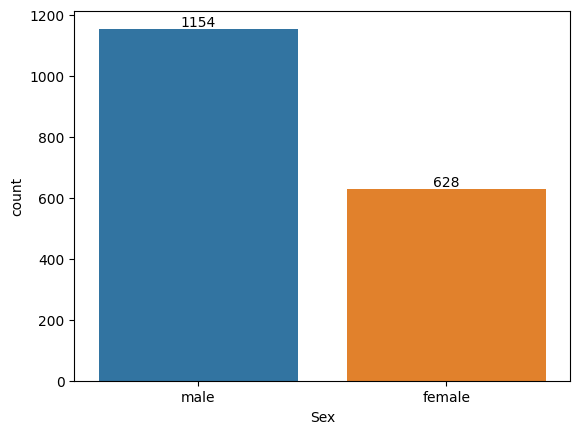

In [7]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()


In [8]:
data['Survived'].value_counts()

Survived
0    1098
1     684
Name: count, dtype: int64

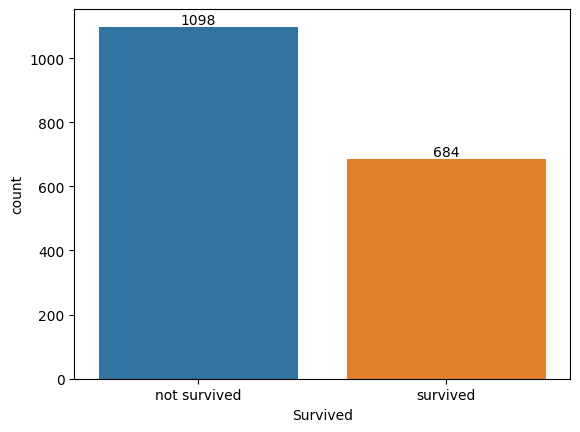

In [9]:
cols = ['Survived', 'count']
survived = ['not survived', 'survived']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Survived'].value_counts()
train_df = pd.DataFrame(
    data=[
        [survived[0], train_counts[0]],
        [survived[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Survived',y='count',data=res_df,hue='Survived', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

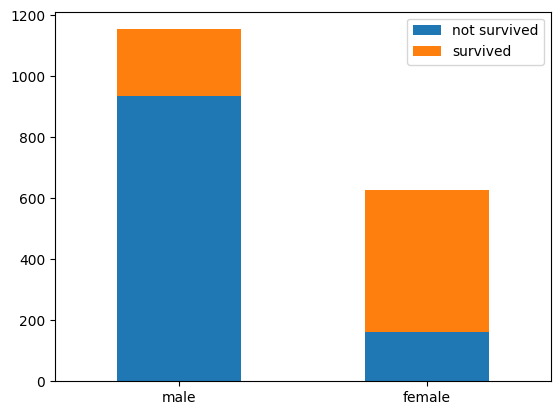

In [10]:
survived = data[data['Survived'] == 1]
man_surv = len(survived[survived['Sex'] == 'male'].index)
woman_surv = len(survived[survived['Sex'] == 'female'].index)

not_survived = data[data['Survived'] == 0]
man_not = len(not_survived[not_survived['Sex'] == 'male'].index)
woman_not = len(not_survived[not_survived['Sex'] == 'female'].index)


res_df = pd.DataFrame(
    {
        'not survived': [man_not, woman_not],
        'survived': [man_surv, woman_surv],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

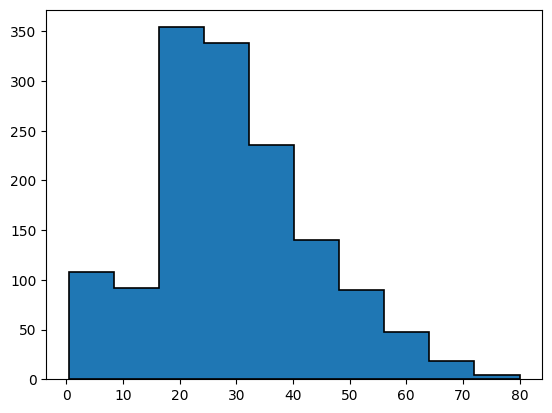

In [11]:
# data['Age'].hist()
plt.hist(data['Age'], histtype="stepfilled", edgecolor='k', linewidth=1.2)
plt.show()

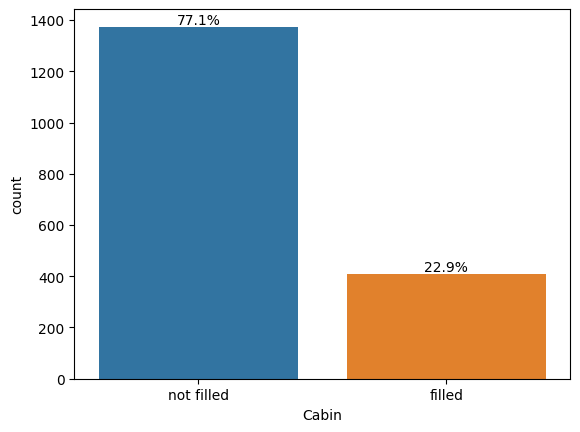

In [12]:
cols = ['Cabin', 'count', 'percent']
filled = ['not filled', 'filled']
res_df = pd.DataFrame(columns=cols, dtype='object')

counts_nan = data['Cabin'].isna().sum()
count_not_nan = data['Cabin'].count().sum()
res_df = pd.DataFrame(
    data=[
        [filled[0], counts_nan, counts_nan/len(data['Cabin'].index)],
        [filled[1], count_not_nan, count_not_nan/len(data['Cabin'].index)]
    ],
    columns=cols
)

for i in res_df.index:
    percent = np.round(res_df.loc[i, 'percent']*100, 2)
    percent = f'{percent}%'
    y = res_df.loc[i, 'count']
    plt.annotate(percent, (i, y), ha="center", va="bottom")

sns.barplot(x='Cabin',y='count',data=res_df,hue='Cabin', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

In [13]:
print(data['Embarked'].value_counts())
print(data['Embarked'].isna().sum())

Embarked
S    1288
C     336
Q     154
Name: count, dtype: int64
4


### Titanic data (post-prep)

In [15]:
data = pd.read_csv("../../data/processed/titanic/titanic.csv", index_col='PassengerId')

In [16]:
data.head()

,Pclass,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_-1,Age_2,Age_12,Age_18,Age_25,Age_35,Age_45,Age_55,Age_65,Age_75,Age_80,SibSp,Parch,Sex,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,7.2500,False,False,True,False,False,False,False,True,False,False,False,False,False,False,1,0,False,0
2,1,71.2833,True,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,True,1
3,3,7.9250,False,False,True,False,False,False,False,False,True,False,False,False,False,False,0,0,True,1
4,1,53.1000,False,False,True,False,False,False,False,False,True,False,False,False,False,False,1,0,True,1
5,3,8.0500,False,False,True,False,False,False,False,False,True,False,False,False,False,False,0,0,False,0


In [17]:
len(data.index)

1778

In [18]:
data.columns

Index(['Pclass', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_-1',
       'Age_2', 'Age_12', 'Age_18', 'Age_25', 'Age_35', 'Age_45', 'Age_55',
       'Age_65', 'Age_75', 'Age_80', 'SibSp', 'Parch', 'Sex', 'Survived'],
      dtype='object')

### Viz

In [19]:
data['Sex'].value_counts()

Sex
False    1154
True      624
Name: count, dtype: int64

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/491848776.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/491848776.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[1], train_counts[1]]


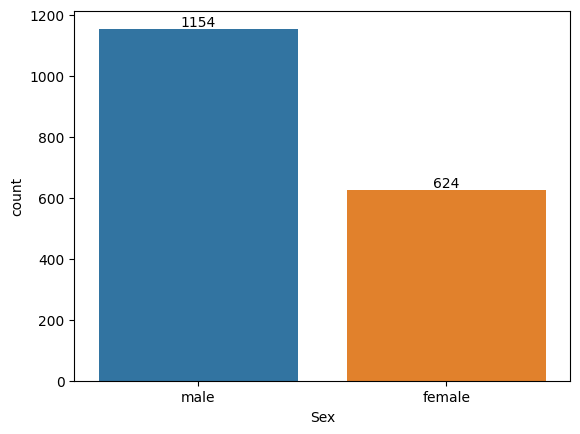

In [20]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()


In [21]:
data['Survived'].value_counts()

Survived
0    1098
1     680
Name: count, dtype: int64

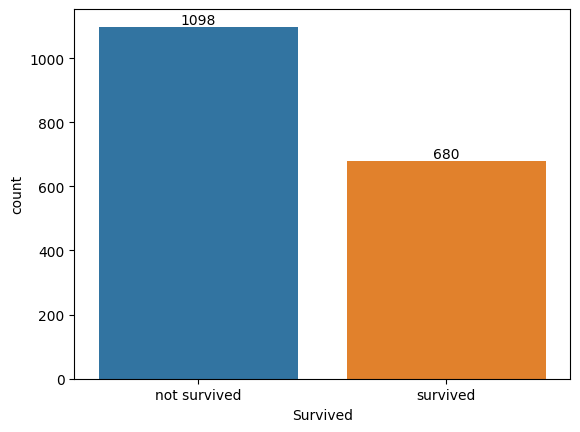

In [22]:
cols = ['Survived', 'count']
survived = ['not survived', 'survived']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Survived'].value_counts()
train_df = pd.DataFrame(
    data=[
        [survived[0], train_counts[0]],
        [survived[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Survived',y='count',data=res_df,hue='Survived', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

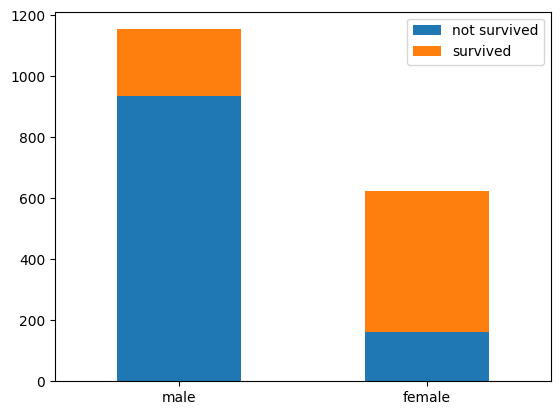

In [23]:
survived = data[data['Survived'] == 1]
man_surv = len(survived[survived['Sex'] == 0].index)
woman_surv = len(survived[survived['Sex'] == 1].index)

not_survived = data[data['Survived'] == 0]
man_not = len(not_survived[not_survived['Sex'] == 0].index)
woman_not = len(not_survived[not_survived['Sex'] == 1].index)


res_df = pd.DataFrame(
    {
        'not survived': [man_not, woman_not],
        'survived': [man_surv, woman_surv],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/1322015064.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ages[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/1322015064.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ages[1], train_counts[1]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_7968/1322015064.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

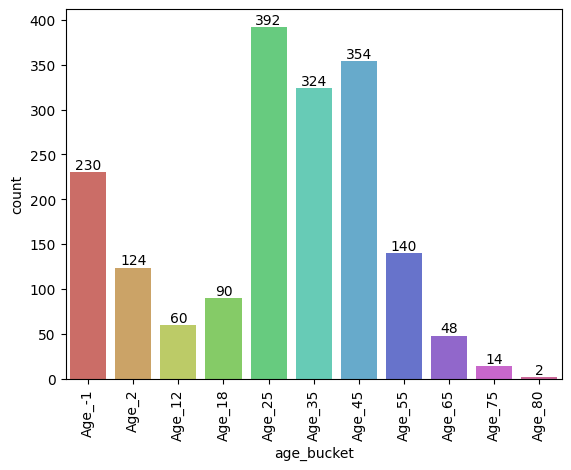

In [24]:
org_cols = ['Age_-1', 'Age_2', 'Age_12', 'Age_18', 'Age_25', 'Age_35', 'Age_45', 'Age_55', 'Age_65', 'Age_75', 'Age_80']
raw_subset = data[org_cols]
subset = pd.get_dummies(raw_subset).idxmax(1)#.str.replace('Age_', '')

cols = ['age_bucket', 'count']
ages = subset.unique()

res_df = pd.DataFrame(columns=cols)

train_counts = subset.value_counts()
train_df = pd.DataFrame(
    data=[
        [ages[0], train_counts[0]],
        [ages[1], train_counts[1]],
        [ages[2], train_counts[2]],
        [ages[3], train_counts[3]],
        [ages[4], train_counts[4]],
        [ages[5], train_counts[5]],
        [ages[6], train_counts[6]],
        [ages[7], train_counts[7]],
        [ages[8], train_counts[8]],
        [ages[9], train_counts[9]],
        [ages[10], train_counts[10]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

res_df['sort'] = res_df['age_bucket'].str.extract('(\d+)', expand=False).astype(int)
res_df.sort_values('sort',inplace=True, ascending=True)
res_df = res_df.drop('sort', axis=1)
res_df.reset_index(inplace=True)

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='age_bucket',y='count',data=res_df,hue='age_bucket', dodge=False, order=org_cols, palette='hls')
plt.xticks(rotation='vertical')
plt.legend([], frameon=False)#bbox_to_anchor=(1.25,1.02), loc="upper right")
plt.show()
